In [51]:

import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100
2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200


Mean Absolute Error (MAE): 64.41843447606682
Mean Squared Error (MSE): 5721.316667465275
Root Mean Squared Error (RMSE): 75.63938568937003
R-squared (R^2) Score: 0.1852132523462644


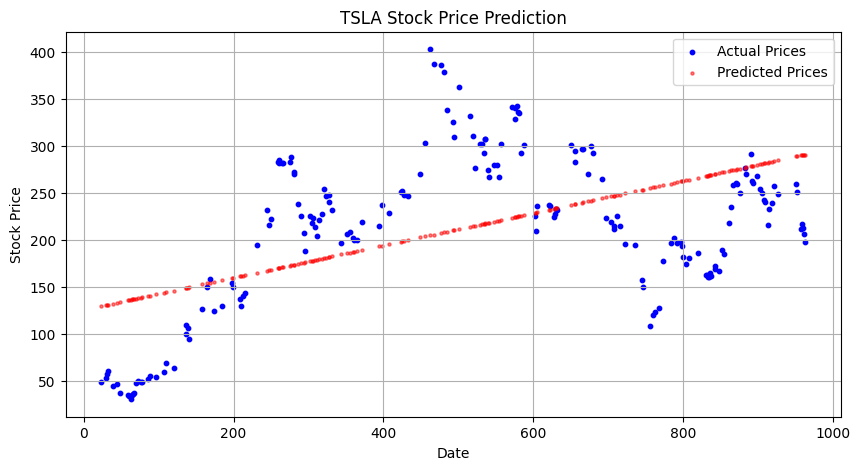

In [52]:

df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

display(df)


#Create a feature for date
df=df[['Close']]


#split data 
df.reset_index(inplace=True)
X=df.index
Y=df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Reshape to 2D Array
X = X.values.reshape(-1, 1)

# Convert X_train and X_test to NumPy arrays and reshape
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

# Create a linear regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

# Make predictions
Y_pred = regression.predict(X_test)

#Prediction score
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, Y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r_squared}")

# Plot the actual and predicted stock prices
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', s=10)
plt.scatter(X_test, Y_pred, color='red', alpha=0.5, label='Predicted Prices', s=5)
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()